# Задание №1
### Реализовать модель классификации на основе бэггинга (BaggingClassifier). Определить оптимальное количество базовых моделей. Сравнить полученные результаты с моделью бустинга (Ada-, Gradient- или XGBoost).
### Для начала реализуем модель бустинга

In [152]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
column_names = ['lettr','x-box','y-box','width','high','onpix','x-bar',
                'y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df = pd.read_csv('letter-recognition.data', sep=',', names = column_names)
Y = df['lettr']
X = df.drop(columns = 'lettr')
x_train, x_test, y_train, y_test = train_test_split(X ,Y, test_size = 0.25, random_state = 1)
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
ada_boost_model = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 200,)

In [4]:
ada_boost_model.fit(x_train, y_train)
ABC_model_predict = ada_boost_model.predict(x_test)

In [5]:
print("Precision =",precision_score(y_test, ABC_model_predict, average='macro'))
print("Recall =",recall_score(y_test, ABC_model_predict, average='macro'))
print("Accuracy =",accuracy_score(y_test, ABC_model_predict))

Precision = 0.8655340664139657
Recall = 0.865103785056714
Accuracy = 0.8648


### Далее реализуем модель на основе бэггинга (BaggingClassifier) и определим для нее оптимальное количество базовых моделей
#### Для начала реализуем модель с параметрами, аналогичными AdaBoostClassifier

In [6]:
native_bagging_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 200)

In [7]:
native_bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [8]:
native_bagging_model_predict = native_bagging_model.predict(x_test)
print("Precision =",precision_score(y_test, native_bagging_model_predict, average='macro'))
print("Recall =",recall_score(y_test, native_bagging_model_predict, average='macro'))
print("Accuracy =",accuracy_score(y_test, native_bagging_model_predict))

Precision = 0.9415551618010459
Recall = 0.9413900212167738
Accuracy = 0.9416


### Для параметров по умолчанию были получены результаты, превосходящие результаты AdaBoostClassifier
### Далее попробуем подобрать оптимальны количество базовых моделей. Данную задачу решим с помощью GridSearch

In [15]:
n_estimators = np.arange(10,310,10)
bagging_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier())
grid = GridSearchCV(estimator = bagging_model,param_grid={"n_estimators":n_estimators}, cv = 3)

In [16]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                   

In [17]:
grid_bagging_model = grid.best_estimator_
grid_bagging_model

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [19]:
grid_bagging_model_predict = grid_bagging_model.predict(x_test)
print("Precision =",precision_score(y_test, grid_bagging_model_predict, average='macro'))
print("Recall =",recall_score(y_test, grid_bagging_model_predict, average='macro'))
print("Accuracy =",accuracy_score(y_test, grid_bagging_model_predict))

Precision = 0.9407760750152931
Recall = 0.9405177420367828
Accuracy = 0.9406


### По результатам работы GridSearch оптимальное количество  базовых моделей n_estimators=180, что почти совпадает с тем значением, которое бралось по умолчанию в первом примере (n_estimators=200), соответственно результат работы полученных моделей практически не отличается. 

# Задание №2
### Для датасета breast_cancer найти наилучший алгоритм кластеризации, согласующийся с ground truth (максимизировать supervised метрики путем выбора алгоритма кластеризации и подбора его параметров).

In [27]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [21]:
load_data = load_breast_cancer()

In [116]:
data = pd.DataFrame(load_data.data, columns = load_data['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
target = load_data.target
print(data.shape)
print(data.size)

(569, 30)
17070


### Исходная выборка представляет из себя 569 экземпляров некотороых классов (выборка содержит 2 класса, но т.к. стоит задача кластеризации, то данная информация буде использоваться лишь для проверки результатов либо в методах, где без нее не обойтись). Каждый элемент характеризуется 30-ю параметрами (т.е. пространство многомерное). 
### Перед началом подбора алгоритма  проанализируем исходные данные, т.к. при таком количестве параметров вполне возможны их зависимости. 

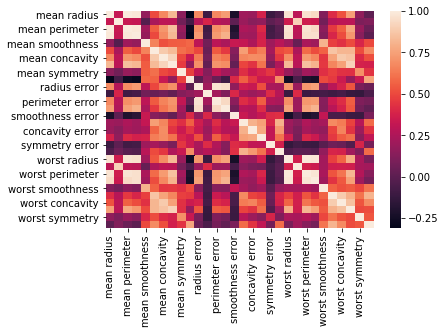

In [41]:
corr = data.corr()
sns.heatmap(corr)

In [55]:
corr_line = np.array(corr).reshape(corr.size)
corr_line.sort()
corr_line = corr_line[:-30]
np.count_nonzero(corr_line>0.9)/2

21.0

### Видно, что данные имеют большое число сильно скоррелированных значений. 21 столбец (исключая диагональ и повтрения (x corr y) & (y corr x)) имеют коэф.корр > 0.9. При таких данных для первичного поиска оптимального алгоритма может быть уместно понижение размерности. Т.к. сначала будет искаться наиболее предпочтительный алгоритм, что можно сделать на неполных данных. Это может снизить затраты при переборе множества возможных алгоритмов. 
#### (Понижение размерности не потребовалось. Хоть данные и содержат большое кол-во признаков, но самих элементов не так много)

### Для оценки работы алгоритмов кластеризации используются supervised метрики (сравнение полученных в результате работы кластеров с известными классами (target))

In [23]:
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score

In [111]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

In [91]:
clustering_models = {"KMeans":KMeans(n_clusters=2),
                     "AffinityPropagation":AffinityPropagation(),
                     "MeanShift":MeanShift(),
                     #"SpectralClustering D":SpectralClustering(n_clusters=2,assign_labels="discretize"),
                     #"SpectralClustering KM":SpectralClustering(n_clusters=2,assign_labels="kmeans"),
                     "AgglomerativeClustering":AgglomerativeClustering(n_clusters=2),
                     "DBSCAN":DBSCAN(),
                     "OPTICS":OPTICS(),
                    }
scores = {}
for model_name in clustering_models:
    print('Обучение и рассчет score для ',model_name)
    model = clustering_models[model_name]
    model.fit(data)
    model_labels = model.labels_
    scores[model_name] = {'completeness_score':completeness_score(model_labels, target),
                         'homogeneity_score':homogeneity_score(model_labels, target),
                         'v_measure_score':v_measure_score(model_labels, target),
                         'adjusted_rand_score':adjusted_rand_score(model_labels, target)}

Обучение и рассчет score для  KMeans
Обучение и рассчет score для  AffinityPropagation
Обучение и рассчет score для  MeanShift
Обучение и рассчет score для  AgglomerativeClustering
Обучение и рассчет score для  DBSCAN
Обучение и рассчет score для  OPTICS


In [92]:
scores

{'KMeans': {'completeness_score': 0.42229071246999117,
  'homogeneity_score': 0.5168089972809706,
  'v_measure_score': 0.46479332792160793,
  'adjusted_rand_score': 0.49142453622455523},
 'AffinityPropagation': {'completeness_score': 0.7049648438008207,
  'homogeneity_score': 0.1690603161007228,
  'v_measure_score': 0.27271887538406536,
  'adjusted_rand_score': 0.08915932404167912},
 'MeanShift': {'completeness_score': 0.5024830485311966,
  'homogeneity_score': 0.43379588382762635,
  'v_measure_score': 0.4656199570716239,
  'adjusted_rand_score': 0.5528955767952657},
 'AgglomerativeClustering': {'completeness_score': 0.26215041159208424,
  'homogeneity_score': 0.40760091453790204,
  'v_measure_score': 0.31908185424236946,
  'adjusted_rand_score': 0.2872456066095377},
 'DBSCAN': {'completeness_score': 0.0,
  'homogeneity_score': 1.0,
  'v_measure_score': 0.0,
  'adjusted_rand_score': 0.0},
 'OPTICS': {'completeness_score': 0.24062552047867916,
  'homogeneity_score': 0.1042879542145079,


### Получены оценки работ алгоритмов с параметрами по умолчанию. Данный пункт служит для того, чтобы определить, какие из представленных алгоритмов в принципе как-либо кластеризуют исходную выборку, в данном пункте не стояла цель получить лучшую модель, только выбор дальнейшего алгоритма
### Из полученных оценок можно сразу отбросить алгоритмы :OPTICS, DBSCAN(единственная 1 т.к. алгоритм определил все классы как -1) и AgglomerativeClustering.
### Алгоритм AffinityPropagation выигрывает лишь по completeness_score, это значит, что полученные им кластеры лучше соответствуют исходным классам и в то-же время довольно низкие остальные показатели, что может говорить о том, что данный алгоритм разбил выборку на более чем 2 кластера отнеся граничные элементы как-либо отделаьно, но это требует более детального анализа
### KMeans и MeanShift показали схожие результаты

In [93]:
from sklearn.model_selection import GridSearchCV

In [105]:
init = ['k-means++', 'random']
n_init = np.arange(1,50)
max_iter = np.arange(300,1100,100)
tol = np.array([1/10**i for i in range(0,10)])
grid = GridSearchCV(estimator = KMeans(n_clusters=2),param_grid={"init":init,
                                                                "n_init":n_init,
                                                                "tol":tol}, cv = 5)
grid.fit(data,target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=2, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'init': ['k-means++', 'random'],
                         'n_init': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'tol': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
best_KMeans = grid.best_estimator_
best_KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=3, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=1.0, verbose=0)

In [107]:
best_KMeans_labels = best_KMeans.labels_
print('completeness_score',completeness_score(best_KMeans_labels, target))
print('homogeneity_score',homogeneity_score(best_KMeans_labels, target))
print('v_measure_score',v_measure_score(best_KMeans_labels, target))
print('adjusted_rand_score',adjusted_rand_score(best_KMeans_labels, target))

completeness_score 0.42229071246999117
homogeneity_score 0.5168089972809706
v_measure_score 0.46479332792160793
adjusted_rand_score 0.49142453622455523


### Результаты оптимизации для метода KMeans не дали ощутимого прироста точности

In [142]:
def search_best_AffinityPropagation(dampings,max_iters,convergence_iters,X,y):
    best_model = AffinityPropagation(copy = True).fit(X)
    for damping in dampings:
        for max_iter in max_iters:
            for convergence_iter in convergence_iters:
                model = AffinityPropagation(damping=damping, max_iter=max_iter,
                                            convergence_iter = convergence_iter,copy = True).fit(X)
                if v_measure_score(model.labels_, target) > v_measure_score(best_model.labels_, target):
                    best_model = model
    return best_model
dampings = np.arange(0.5,1,0.1)
max_iters = np.arange(300,1100,100)
convergence_iters = np.arange(10,30)
best_Affinity_model = search_best_AffinityPropagation(dampings,max_iters,convergence_iters,data,target)

In [143]:
best_Affinity_model

AffinityPropagation(affinity='euclidean', convergence_iter=10, copy=True,
                    damping=0.6, max_iter=300, preference=None, verbose=False)

In [144]:
print('completeness_score',completeness_score(best_Affinity_model.labels_, target))
print('homogeneity_score',homogeneity_score(best_Affinity_model.labels_, target))
print('v_measure_score',v_measure_score(best_Affinity_model.labels_, target))
print('adjusted_rand_score',adjusted_rand_score(best_Affinity_model.labels_, target))

completeness_score 0.6724394607097515
homogeneity_score 0.17999597880234058
v_measure_score 0.2839778669574021
adjusted_rand_score 0.12515527913067145


### Для AffinityPropagation анлогично не удалось подобрать параметры, дающие повышение точности

In [149]:
def search_best_MeanShift(bandwidths,X,y):
    best_model = MeanShift().fit(X)
    for bandwidth in bandwidths:
        model = MeanShift(bandwidth = bandwidth).fit(X)
        if v_measure_score(model.labels_, target) > v_measure_score(best_model.labels_, target):
            best_model = model
    return best_model
bandwidths = np.arange(1,10,0.1)
best_MeanShift_model = search_best_MeanShift(bandwidths,data,target)

In [150]:
best_MeanShift_model

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [151]:
print('completeness_score',completeness_score(best_MeanShift_model.labels_, target))
print('homogeneity_score',homogeneity_score(best_MeanShift_model.labels_, target))
print('v_measure_score',v_measure_score(best_MeanShift_model.labels_, target))
print('adjusted_rand_score',adjusted_rand_score(best_MeanShift_model.labels_, target))

completeness_score 0.5024830485311966
homogeneity_score 0.43379588382762635
v_measure_score 0.4656199570716239
adjusted_rand_score 0.5528955767952657


### Для MeanShift результаты аналогично изменились не сильно. Результат работы данного метода соспоставим по эффективности с KMeans.

### Из полученных результатво можно сделать вывод, что задача кластеризаций на данном наборе данных является довлльно сложной и трудно подобрать алгоритм, который бы так искал "сгущения" выборки, чтобы они с высокой точностью соотносились с существующими в выборке классами. Существующие зависимости между классами и параметрами объектов слишком сложны, чтобы их можно было однозначно разделить используя метрики между элементами.